In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
X = pd.read_csv('./Training data/Linear_X_Train.csv').values
y = pd.read_csv('./Training data/Linear_Y_Train.csv').values.reshape(-1)

In [3]:
print(X.shape,y.shape)

(3750, 1) (3750,)


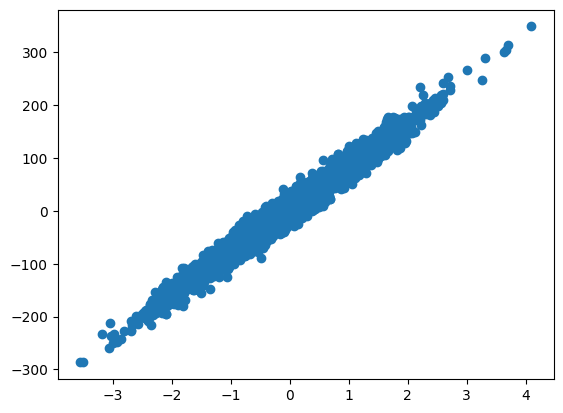

In [4]:
plt.scatter(X,y)
plt.show()

In [5]:
def hypothesis (X,w,w0):
    #ypred = []
    #for i in  range(X.shape[0]):
    #    p = X[i].dot(w) + w0
    #    ypred.append(p)
    #return np.array(ypred)
    return w@X.T + w0

In [6]:
w = [1]
w0 = 1
ypred = hypothesis(X,w,w0)

In [7]:
ypred

array([0.71069258, 0.41119037, 2.02750749, ..., 0.69483634, 2.67583291,
       0.50824276], shape=(3750,))

In [8]:
def loss_function(X,w,w0,y):
    ypred = hypothesis(X,w,w0)
    return np.mean((ypred-y)**2)

In [9]:
w = [1]
w0 = 1
loss_function(X,w,w0,y)

np.float64(6418.398281673329)

In [10]:
def Gradient_Descent(X,y, alpha = 0.01, epochs=100):
    w0 = 1
    w = np.ones(shape=(X.shape[1],))

    for e in range(epochs):
        ypred = hypothesis(X,w,w0)
        grad = np.mean((ypred-y)*X.T,axis = 1)
    #    grad = np.zeros(shape=(X.shape[1],))
    #    for j in range (X.shape[1]):
            # for i in range (X.shape[0]):
            #     grad[j] += (ypred[i] - y[i])*X[i][j]
            # grad[j] /= X.shape[0]
    #        grad[j] = np.mean((ypred-y)*X[:,j])
            
        w = w - alpha*grad
        w0 = w0 - alpha*np.mean(ypred-y)
    return w,w0

In [11]:
w,w0 = Gradient_Descent(X,y,alpha = 0.05 )

In [12]:
w,w0

(array([80.02268425]), np.float64(3.613619851436889))

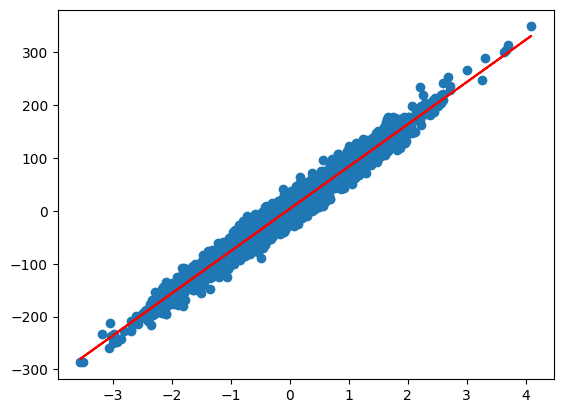

In [13]:
plt.scatter(X,y)
plt.plot(X,hypothesis(X,w,w0), c ='r')
plt.show()

In [14]:
class LinearReg :
    def __init__(self,alpha = 0.01, epoches = 100):
        self.alpha = alpha
        self.epoches = epoches

        def fit(self,X,y):
            self.w,self.w0 = self.Gradient_Descent(X,y,self.alpha,self.epoches)

        
        def hypothesis (self,X,w,w0):
            return w@X.T + w0

        def loss_function(self,X,w,w0,y):
            ypred = self.hypothesis(X,w,w0)
            return np.mean((ypred-y)**2)

        def Gradient_Descent(self,X,y, alpha = 0.01, epoches=100):
            w0 = 1
            w = np.ones(shape=(X.shape[1],))
        
            for e in range(epoches):
                ypred = self.hypothesis(X,w,w0)
                grad = np.mean((ypred-y)*X.T,axis = 1)
            
                w = w - alpha*grad
                w0 = w0 - alpha*np.mean(ypred-y)
            return w,w0

        def predict(self,X):
            return self.hypothesis(X,self.w,self.w0)
            

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
clf = LinearReg(epoches = 1000)
clf.fit(x_train,y_train)

AttributeError: 'LinearReg' object has no attribute 'fit'

In [31]:
clf.predict(x_test)

AttributeError: 'LinearReg' object has no attribute 'predict'